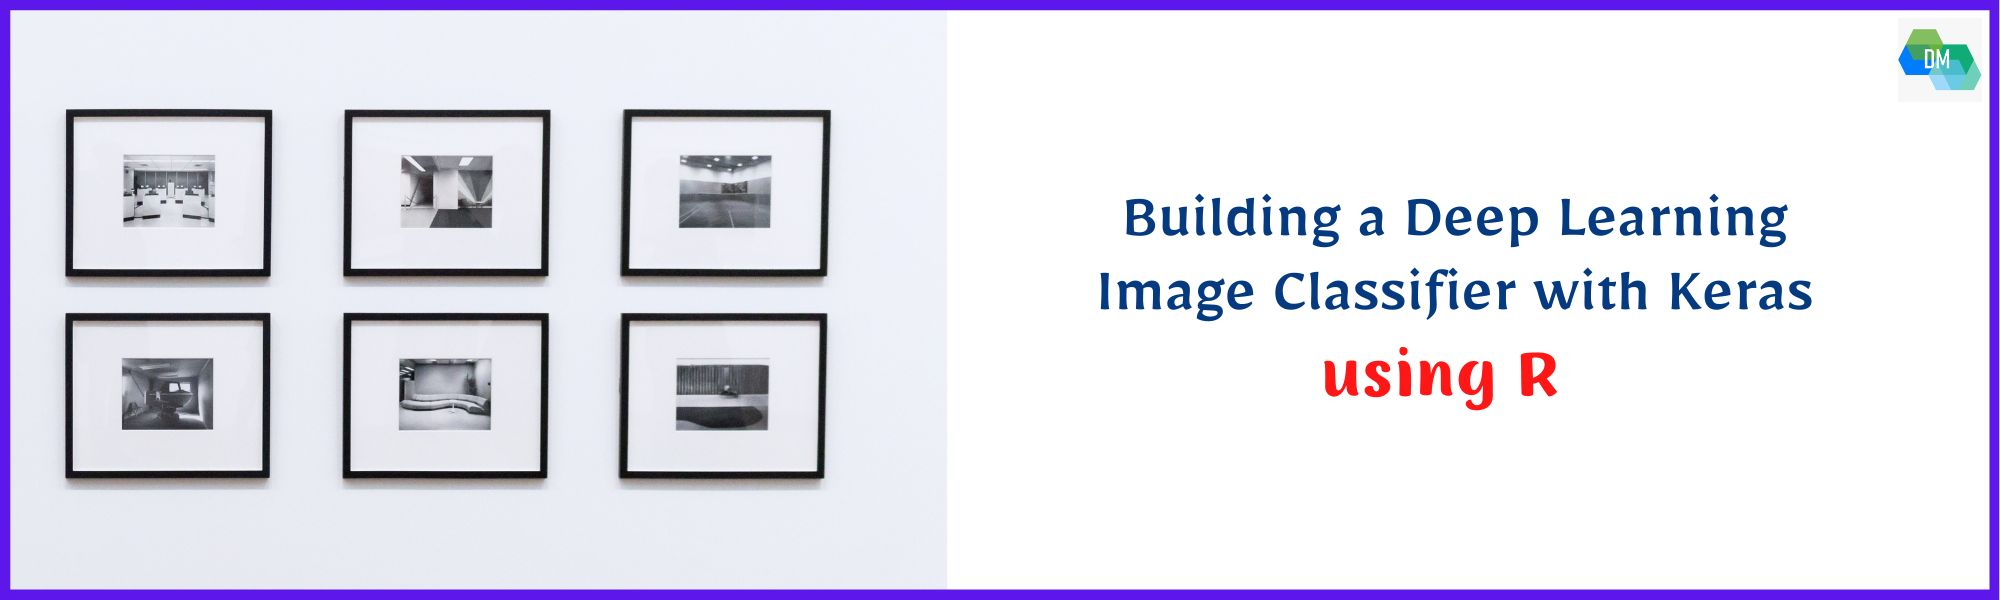

<p style="font-family: Arials; font-size: 20px;text-align: center;; font-style: normal;line-height:1.3">This article explains a step-by-step approach to build a deep learning image classification model with Keras in R.</p>

<h3 style="font-family: Arial;background-color:#abc4ff;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [1]:
library(keras)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



<h3 style="font-family: Arial;background-color:#abc4ff;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Importing dataset 📝 </centre></strong></h3>

We will be using the Fashion MNIST dataset, which has 70,000 grayscale images. Each image is a grayscale `28` x `28` image classified into `10` separate categories. Each image has a label attached to it. There are ten labels in total:
`T-shirt/top`,`Trouser`,`Pullover`,`Dress`,`Coat`,`Sandal`,`Shirt`,`Sneaker`,`Bag`,and `Ankle boot`.

In [2]:
fashion_mnist <- dataset_fashion_mnist()
c(train_images, train_labels) %<-% fashion_mnist$train
c(test_images, test_labels) %<-% fashion_mnist$test

Loaded Tensorflow version 2.6.5



In addition, `60,000` images will be used to train the model, and `10,000` images will be used to evaluate how well the model learned to classify images.

In [3]:
class_names = c('T-shirt/top',
                'Trouser',
                'Pullover',
                'Dress',
                'Coat', 
                'Sandal',
                'Shirt',
                'Sneaker',
                'Bag',
                'Ankle boot')

In [4]:
dim(train_images)

[1] 60000    28    28

In [5]:
dim(train_labels)

[1] 60000

In [6]:
train_labels[1:20]

[1] 9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4

In [7]:
dim(test_images)

[1] 10000    28    28

In [8]:
dim(test_labels)

[1] 10000

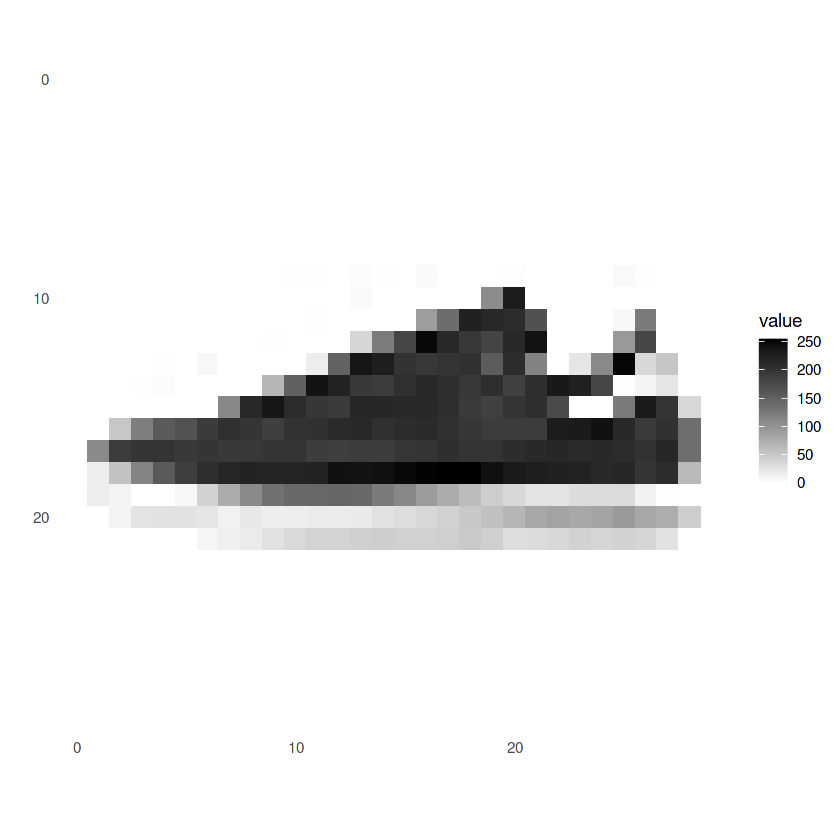

In [9]:
options(repr.plot.width=7, repr.plot.height=7) 
sample_image <- as.data.frame(train_images[7, , ])
colnames(sample_image) <- seq_len(ncol(sample_image))
sample_image$y <- seq_len(nrow(sample_image))
sample_image <- gather(sample_image, "x", "value", -y)
sample_image$x <- as.integer(sample_image$x)
ggplot(sample_image, aes(x = x, y = y, fill = value)) +
    geom_tile() + scale_fill_gradient(low = "white", high = "black", na.value = NA) +
    scale_y_reverse() + theme_minimal() + theme(panel.grid = element_blank()) +
    theme(aspect.ratio = 1) + xlab("") + ylab("")

Before training the model, the data must be pre-processed. To reduce the pixel values, we must normalize the data. Currently, all image pixels have values ranging from 0-255, and we want values between 0 and 1. As a result, we will divide all the pixel values into the train and test sets by 255.0.

In [10]:
train_images <- train_images / 255
test_images <- test_images / 255

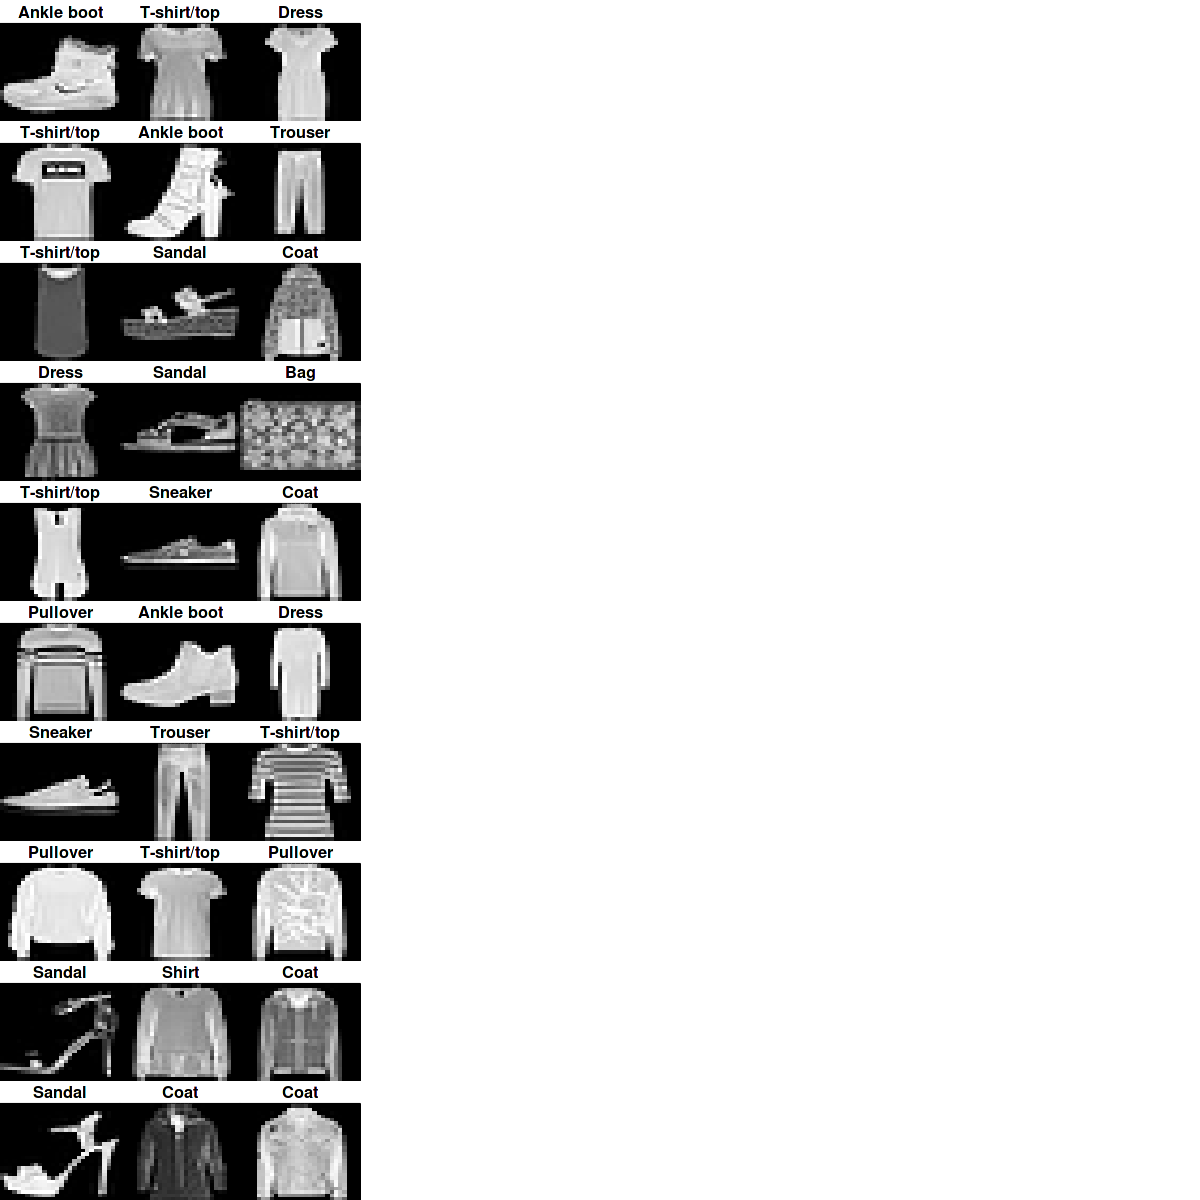

In [11]:
options(repr.plot.width=10, repr.plot.height=10) 
par(mfcol=c(10,10))
par(mar=c(0, 0, 1.5, 0), xaxs='i', yaxs='i')
for (i in 1:30) { 
  img <- train_images[i, , ]
  img <- t(apply(img, 2, rev)) 
  image(1:28, 1:28, img, col = gray((0:255)/255), xaxt = 'n', yaxt = 'n',
        main = paste(class_names[train_labels[i] + 1]))
}

In [12]:
x_train <- train_images %>%
    array_reshape(c(60000, 28, 28, 1))
x_test <- test_images %>%
    array_reshape(c(10000, 28, 28, 1))

In [13]:
dim(train_images)
dim(x_train)

[1] 60000    28    28

[1] 60000    28    28     1

<h3 style="font-family: Arial;background-color:#abc4ff;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Model Building </centre></strong></h3>

In [14]:
model <- keras_model_sequential()
model %>%
    layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = 'relu', input_shape = c(28, 28, 1)) %>%
    layer_max_pooling_2d(pool_size = c(2,2)) %>%
    layer_flatten() %>%
    layer_dense(units = 128, activation = 'relu') %>%
    layer_dropout(rate = 0.5) %>%
    layer_dense(units = 10, activation = 'softmax')

In [15]:
summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d (Conv2D)                     (None, 26, 26, 32)              320         
________________________________________________________________________________
max_pooling2d (MaxPooling2D)        (None, 13, 13, 32)              0           
________________________________________________________________________________
flatten (Flatten)                   (None, 5408)                    0           
________________________________________________________________________________
dense_1 (Dense)                     (None, 128)                     692352      
________________________________________________________________________________
dropout (Dropout)                   (None, 128)                     0           
________________________________________________________________________________
dense (D

In [16]:
model %>% compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam', 
    metrics = c('accuracy')
) 

In [17]:
history<- model %>% fit(x_train, train_labels, epochs = 15,verbose = 2)

In [18]:
history_df <- as.data.frame(history)
str(history_df)

'data.frame':	30 obs. of  4 variables:
 $ epoch : int  1 2 3 4 5 6 7 8 9 10 ...
 $ value : num  0.494 0.341 0.303 0.279 0.257 ...
 $ metric: Factor w/ 2 levels "loss","accuracy": 1 1 1 1 1 1 1 1 1 1 ...
 $ data  : Factor w/ 2 levels "training","validation": 1 1 1 1 1 1 1 1 1 1 ...


In [19]:
hist<-as_tibble(history_df)
hist

epoch,value,metric,data
<int>,<dbl>,<fct>,<fct>
1,0.4941977,loss,training
2,0.3408750,loss,training
3,0.3030718,loss,training
4,0.2788361,loss,training
5,0.2573719,loss,training
6,0.2402601,loss,training
7,0.2250136,loss,training
8,0.2101292,loss,training
9,0.2013237,loss,training


In [20]:
score <- model %>% evaluate(x_train, train_labels)
cat('Train Loss & Accuracy:', score,'acc', "\n")

Train Loss & Accuracy: 0.08748692 0.9700834 acc 


`geom_smooth()` using formula 'y ~ x'



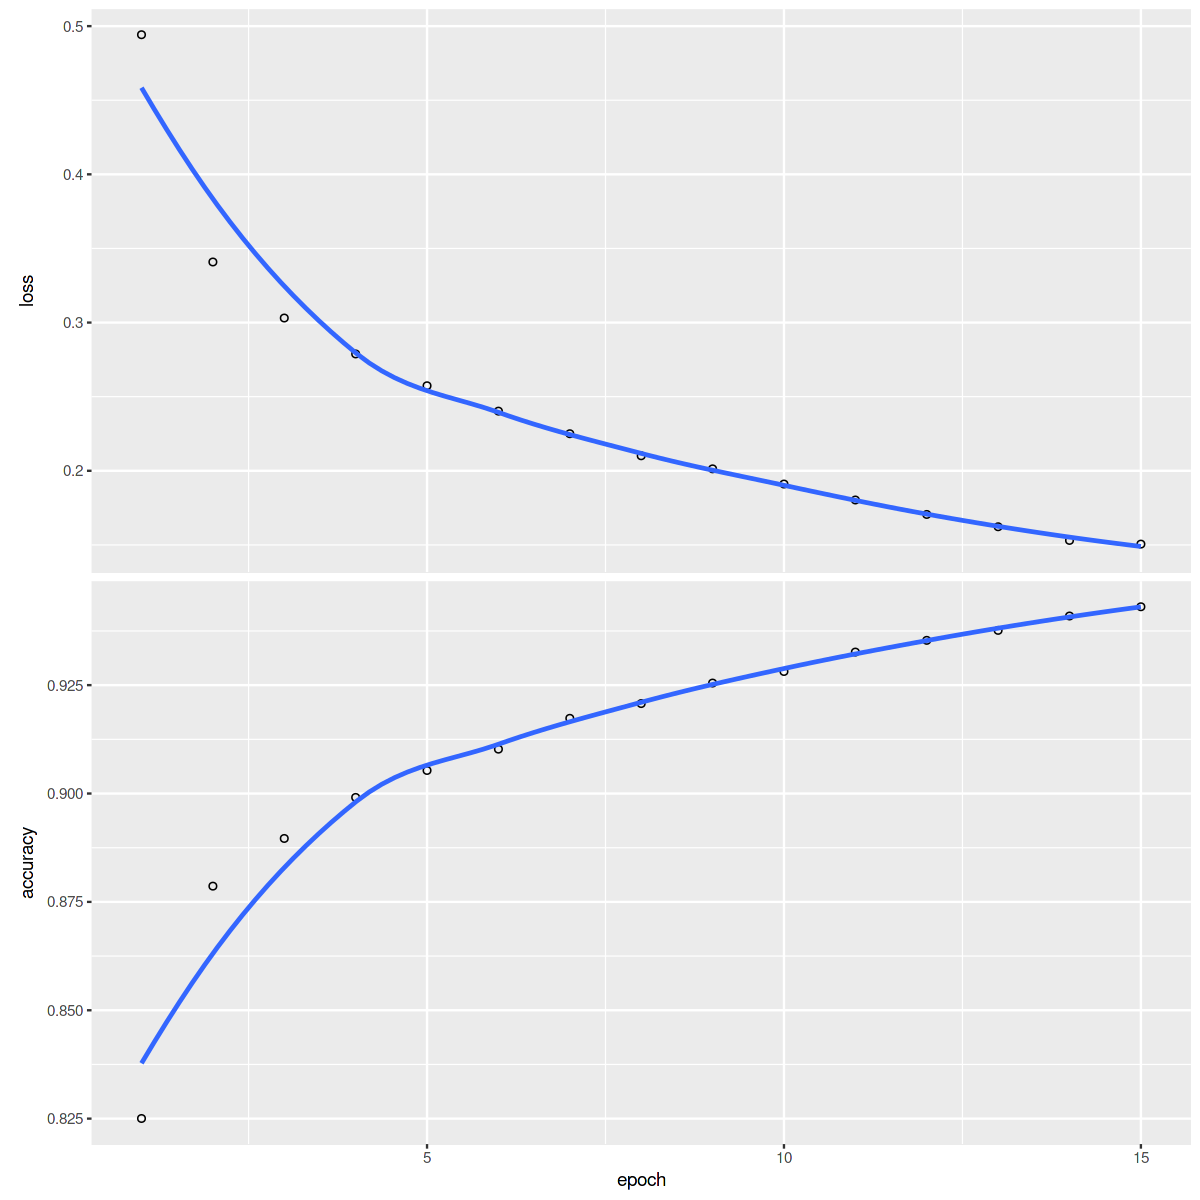

In [21]:
plot(history)

In [22]:
score <- model %>% evaluate(x_test, test_labels)
cat('Test Loss & Accuracy:', score,'acc', "\n")

Test Loss & Accuracy: 0.2685581 0.9163 acc 


In [23]:
predictions <- model %>% predict(x_test)

In [24]:
predictions[1, ]

[1] 2.312278e-09 2.110756e-10 1.401354e-10 5.778922e-11 2.126232e-10
 [6] 6.352430e-06 4.512829e-10 2.426815e-05 2.681013e-11 9.999694e-01

In [25]:
which.max(predictions[1, ])

[1] 10

class_pred <- model %>% predict_classes(x_test)
class_pred[1:20]

test_labels[1]

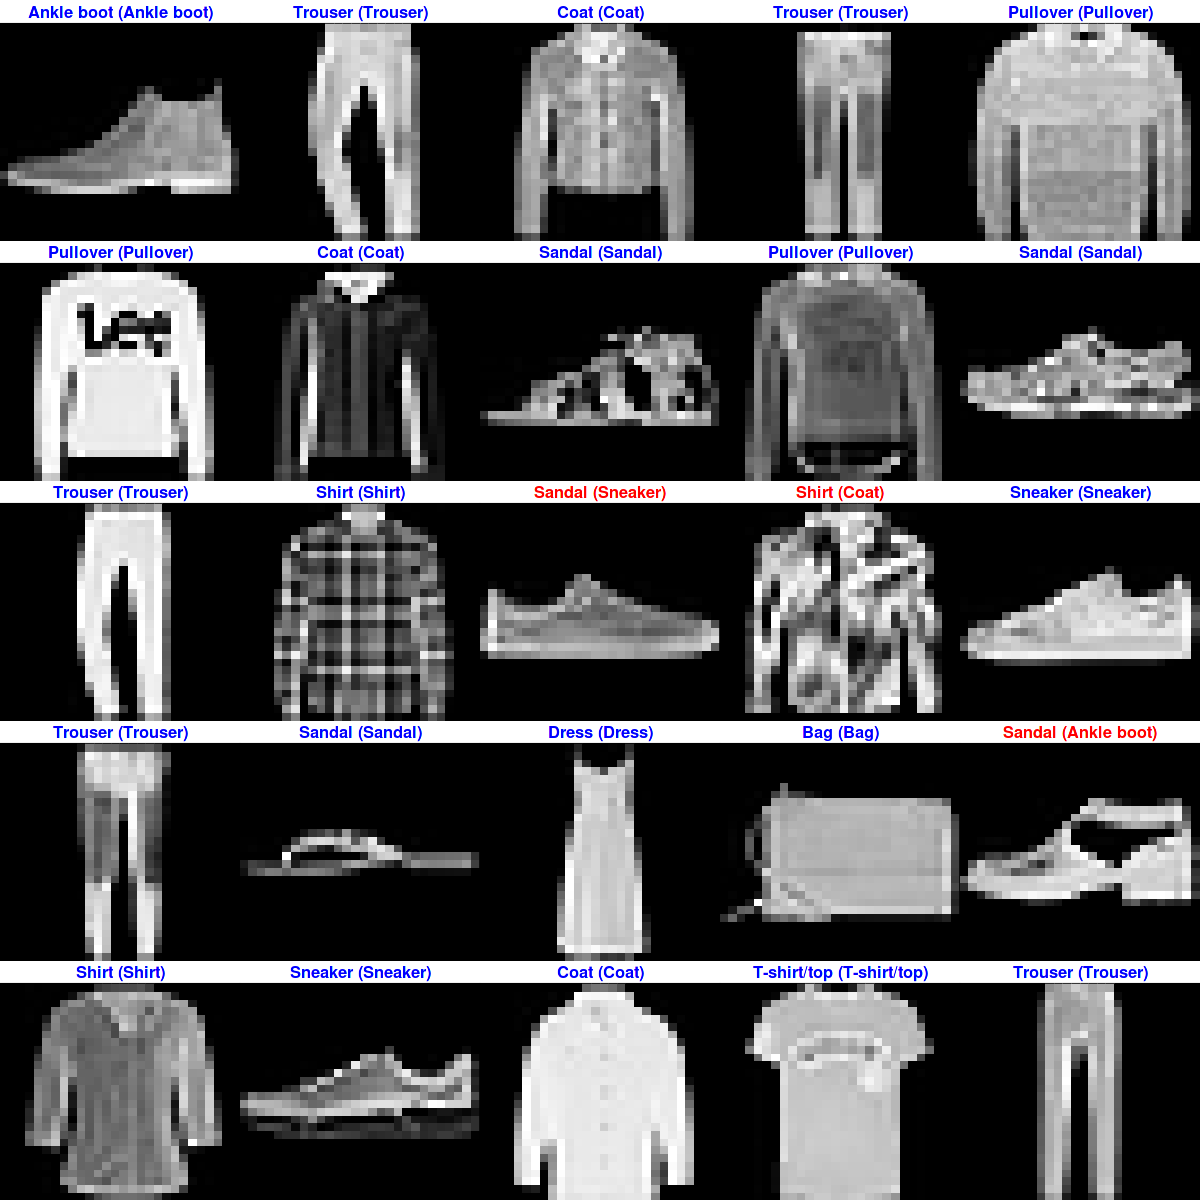

In [28]:
options(repr.plot.width=10, repr.plot.height=10) 
par(mfcol=c(5,5))
par(mar=c(0, 0, 1.5, 0), xaxs='i', yaxs='i')
for (i in 1:25) { 
  img <- test_images[i, , ]
  img <- t(apply(img, 2, rev)) 
  predicted_label <- which.max(predictions[i, ]) - 1
  true_label <- test_labels[i]
  if (predicted_label == true_label) { color <- 'blue' } 
    else 
    { color <- 'red' }
  image(1:28, 1:28, img, col = gray((0:255)/255), xaxt = 'n', yaxt = 'n',
        main = paste0(class_names[predicted_label + 1], " (",class_names[true_label + 1], ")"),col.main = color)}

📌 Details of the model setup are discussed in my article https://www.analyticsvidhya.com/blog/2022/07/building-a-deep-learning-image-classifier-with-keras-using-r/ published on AnalyticsVidhya.


<h3 style="font-family: Arial;background-color:#abc4ff;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>If you found this notebook useful, please Upvote. Thanks!  </centre></strong></h3>